In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import sys
sys.path.append('..')

In [6]:
file_path = "../data/raw/raw_analyst_ratings.csv"
from scripts.file_loader import load_file

In [9]:
news_data = load_file(file_path)
news_data.head()

File successfully loaded: ../data/raw/raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


#### Shape or Size of news data

In [10]:
news_data.shape

(1407328, 6)

#### Checking news data for missing values

In [11]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

#### date to datetime for analysis

In [13]:
# Convert date to datetime for analysis
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data.head(3)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A


#### Basic Statistics for Headline Lengths


In [14]:
news_data['headline_length'] = news_data['headline'].apply(len)
length_stats = news_data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(length_stats)

Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


#### Count the Number of Articles per Publisher

In [15]:
publisher_counts = news_data['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


#### Analyze Publication Dates

In [16]:
news_data['day_of_week'] = news_data['date'].dt.day_name()
publication_trends = news_data['day_of_week'].value_counts()
print("\nPublication Trends (Articles by Day of the Week):")
print(publication_trends)


Publication Trends (Articles by Day of the Week):
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


#### Visualizing Headline Lengths

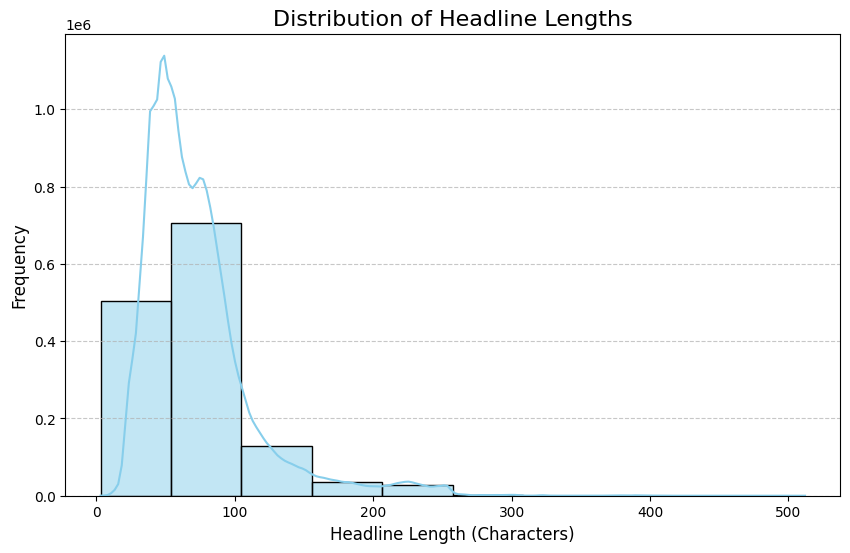

In [17]:

# 1. Visualizing Headline Lengths
plt.figure(figsize=(10, 6))
sns.histplot(news_data['headline_length'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Visualizing Article Counts per Publisher

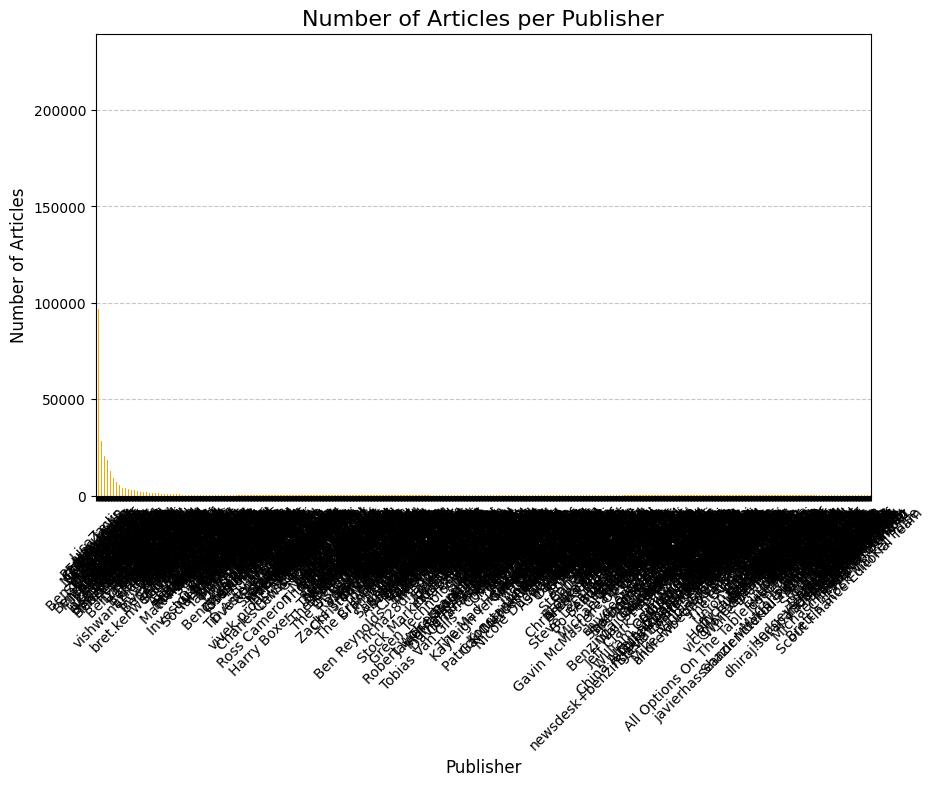

In [19]:
# 2. Visualizing Article Counts per Publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Visualizing Publication Trends by Day of the Week

C:\Users\Coop\AppData\Local\Temp\ipykernel_8840\2313654122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')


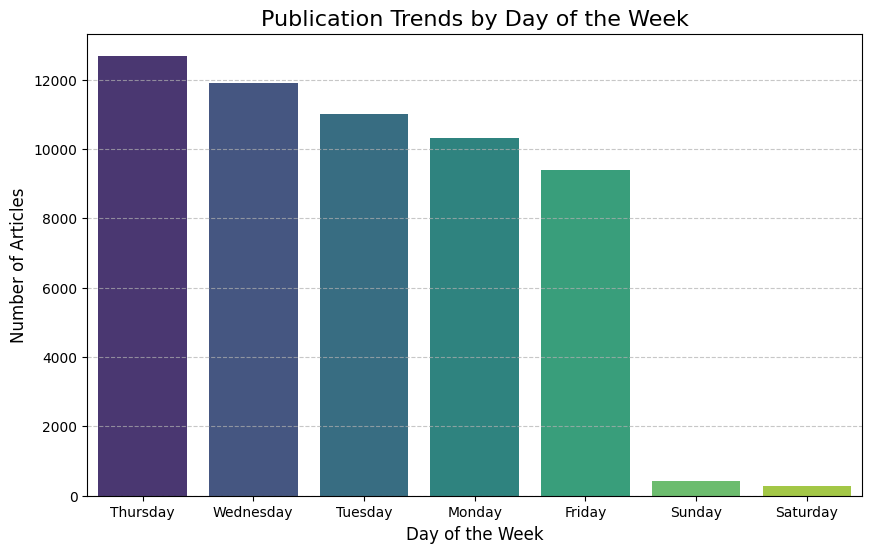

In [21]:
# 3. Visualizing Publication Trends by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')
plt.title('Publication Trends by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Text Analysis(Sentiment analysis & Topic Modeling)

In [ ]:
from scripts.financial_analysis import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK VADER data
nltk.download('vader_lexicon')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis
def analyze_sentiment(headline):
    score = sia.polarity_scores(headline)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the headlines
news_data['sentiment'] = news_data['headline'].apply(analyze_sentiment)

# View sentiment counts
sentiment_counts = news_data['sentiment'].value_counts()
print(sentiment_counts)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


sentiment
Neutral     741200
Positive    441852
Negative    224276
Name: count, dtype: int64


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# TF-IDF Vectorizer for Keyword Extraction
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(news_data['headline'])

# Display top keywords
keywords = tfidf.get_feature_names_out()
print("Top Keywords:", keywords)

# Extract Bigrams (phrases of two words)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10)
bigram_matrix = bigram_vectorizer.fit_transform(news_data['headline'])

# Display top bigrams
bigrams = bigram_vectorizer.get_feature_names_out()
print("Top Bigrams:", bigrams)


Top Keywords: ['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']
Top Bigrams: ['52 week' 'companies trading' 'earnings scheduled' 'initiates coverage'
 'market update' 'mid day' 'pre market' 'price target' 'raises pt'
 'stocks moving']


## Time Series Analysis:

In [27]:
### Publication Frequency Over Time ###
# Group by date and count the number of publications
news_data['publication_date'] = news_data['date'].dt.date
daily_counts = news_data.groupby('publication_date').size()

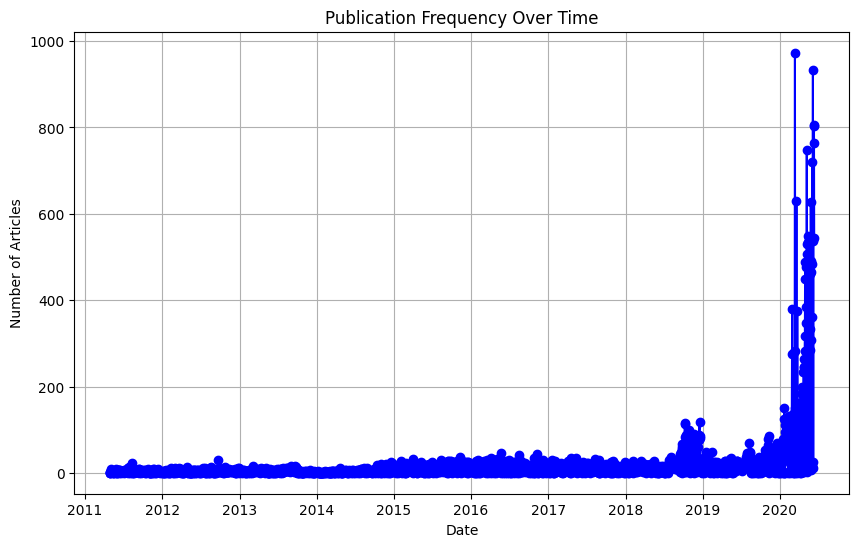

In [28]:
# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [30]:
### Publishing Times Analysis ###
# Extract hour from the `date` column
news_data['publication_hour'] = news_data['date'].dt.hour

# Count the number of publications by hour
hourly_counts = news_data['publication_hour'].value_counts().sort_index()


C:\Users\Coop\AppData\Local\Temp\ipykernel_19544\590171137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


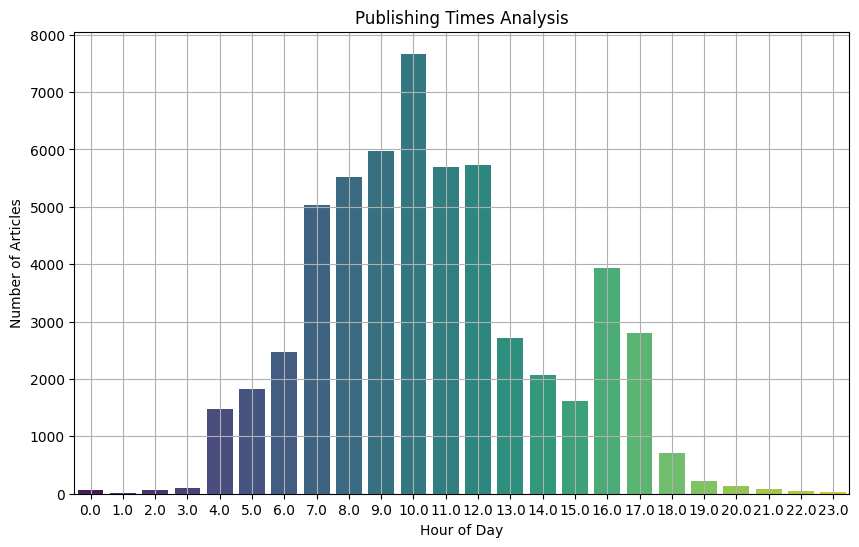

In [31]:
# Plot publishing times
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Publishing Times Analysis')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()